# TASK 2


## Database Structure

* **Database Name**: IOT_project
* **Collection Name**: Data
* Each document in the collection follows this structure.
```javascript
{
  "_id": { "$oid": "67b7854512452214fd" },
  "time": "2025-02-17 15:11:43",  // Timestamp of the data point
    "x": { "$numberDouble": "3.75" },  
    "y": { "$numberDouble": "3.33" }  
  },
  "heart_rate": { "$numberInt": "141" },  
  "raw_data": {
    "acceleration": {
      "x": { "$numberDouble": "3.75" },  
      "y": { "$numberDouble": "3.33" }   
    },
    "time": "2025-02-15 09:14:53",  
    "heart_rate": { "$numberInt": "141" }  
  }
}

 


## Schema Breakdown
| **Field**               | **Type**            | **Description** |
|-------------------------|---------------------|-----------------|
| `_id`                   | `ObjectId`          | Unique identifier for each document (automatically generated). |
| `time`                  | `String (ISO 8601)` | Timestamp when the data was recorded. |
| `acceleration`          | `Object`            | Contains `x` and `y` acceleration values (measured in m/s²). |
| `acceleration.x`        | `Double`            | Acceleration value along the X-axis. |
| `acceleration.y`        | `Double`            | Acceleration value along the Y-axis. |
| `heart_rate`            | `Integer`           | Heart rate (in beats per minute, BPM). |
| `raw_data`              | `Object`            | Stores unprocessed raw sensor data. |
| `raw_data.acceleration` | `Object`            | Duplicate of the `acceleration` object for reference. |
| `raw_data.acceleration.x` | `Double`          | Raw x-axis acceleration value from sensor. |
| `raw_data.acceleration.y` | `Double`          | Raw y-axis acceleration value from sensor. |
| `raw_data.time`         | `String (ISO 8601)` | Timestamp for the raw data. |
| `raw_data.heart_rate`   | `Integer`           | Raw heart rate value from the sensor. |



## Indexes

### Implementing Indexes and the Rationale behind it:

1. **Index on server_timestamp (Descending):**
* Enables efficient sorting and retrieval of the most recent sensor data.Quickly fetching the latest heart rate or acceleration values.

2. **Compound Index on sensor_type and server_timestamp:**
* Optimizes queries filtering by sensor_type (heart rate, accelerometer) while retrieving the latest readings.Use Case: Fetching recent heart rate or motion sensor readings without scanning the entire dataset.

3. **Compound Index on device_id and server_timestamp:**
*  Enhances device-specific queries by allowing fast retrieval of recent data from a specific ESP32 device.Querying the latest data from a specific device for debugging or monitoring.
 

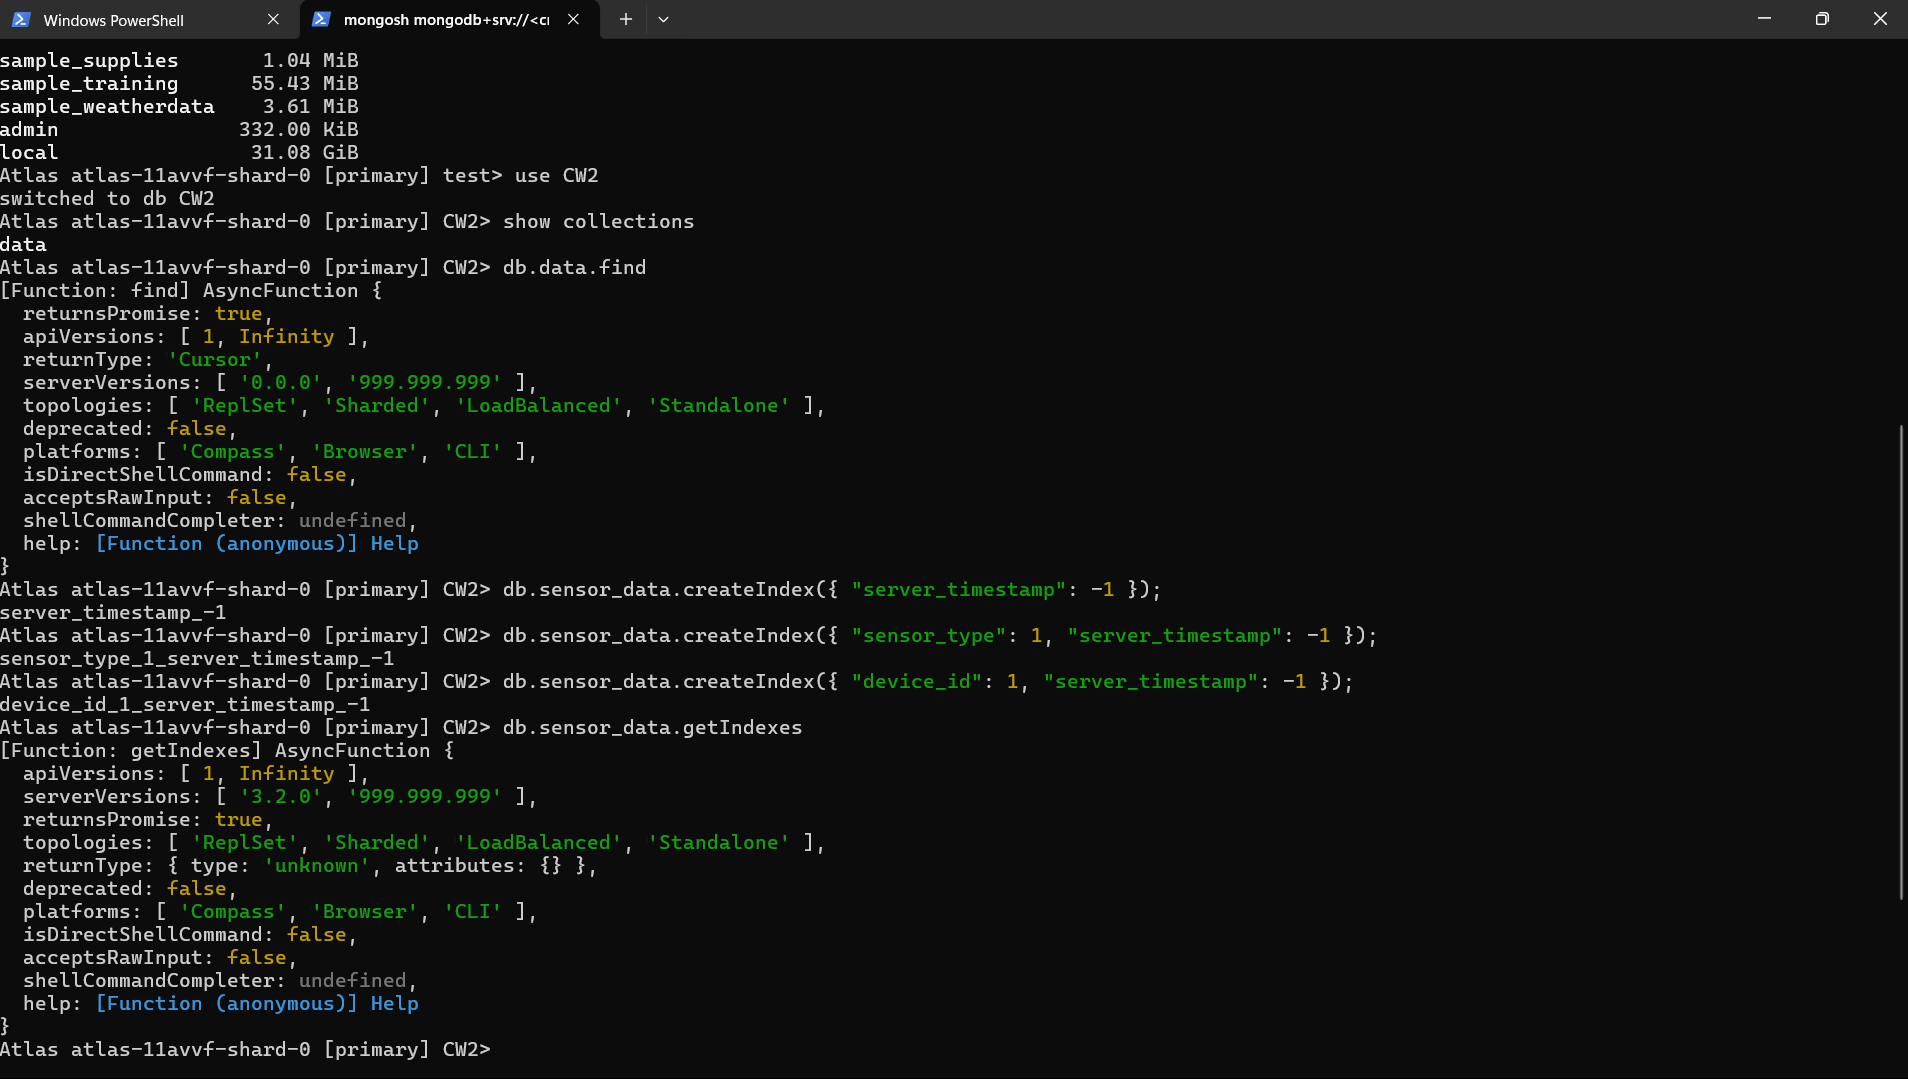

# TASK 3

# Aggregate pipelines

### 1. Correlation Between Acceleration & Heart Rate
 db.data.aggregate([{"$project":{"heart_rate":1,"accel_x":1,"accel_y":1}}])

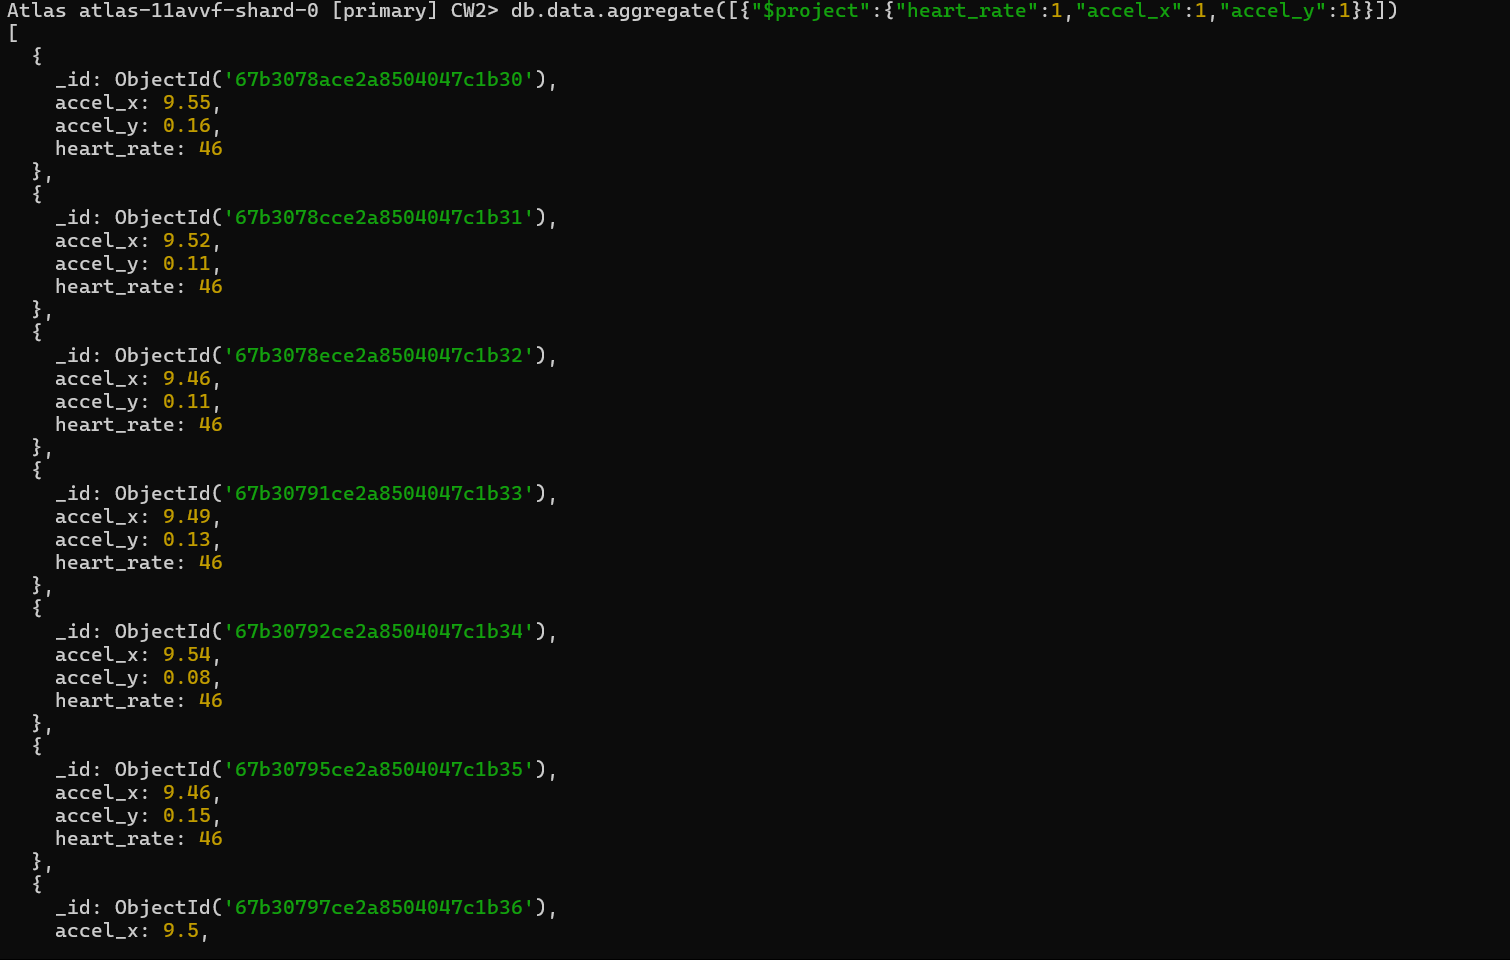


### 2. Count Total Records
db.sensor_data.aggregate([
  { "$count": "total_records" }
])

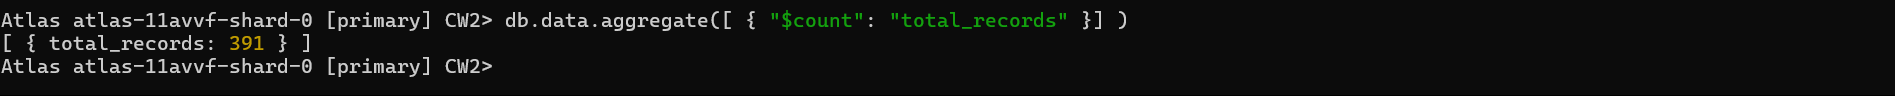

### 3. Max & Min Heart Rate in a Day
db.sensor_data.aggregate([
  { "$group": { "_id": "$timestamp", "max_hr": { "$max": "$heart_rate" }, "min_hr": { "$min": "$heart_rate" } } }
])

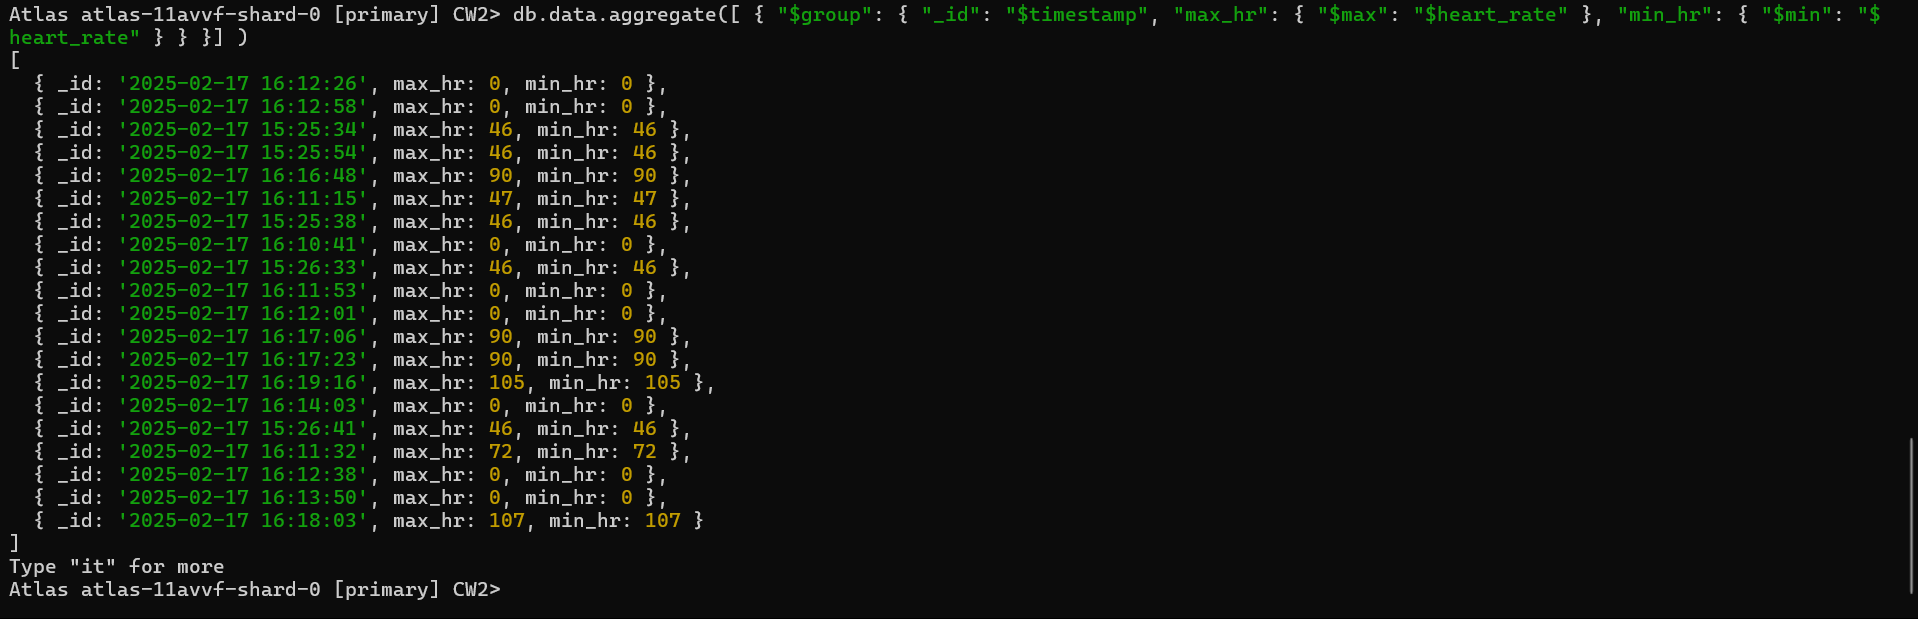


### 4. Moving Average for Smoother Trends

db.sensor_data.aggregate([
  { "$sort": { "timestamp": 1 } },
  { "$group": { "_id": null, "smoothed_hr": { "$avg": "$heart_rate" } } }
])

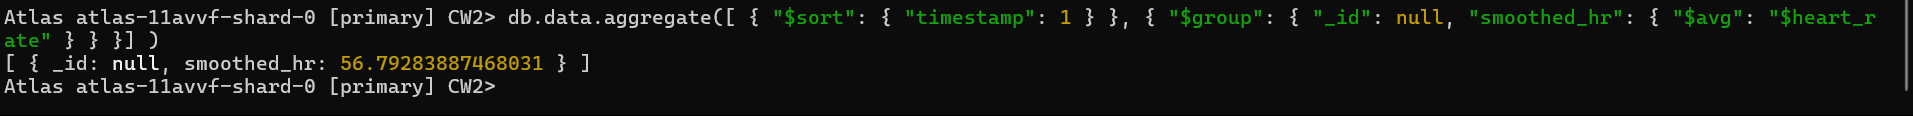


### 5.Average Heart Rate Over Time Intervals (Hourly)
db.sensor_data.aggregate([
  {
    "$group": {
      "_id": { "$hour": { "$toDate": "$timestamp" } },
      "avg_hr": { "$avg": "$heart_rate" }
    }
  },
  { "$sort": { "_id": 1 } }
])

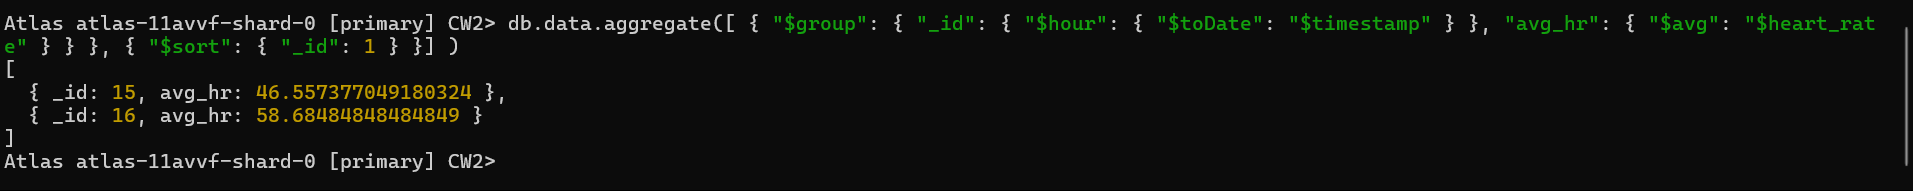


# Visualization using Atlas Charts

In [5]:
from IPython.display import display, HTML
iFrame_code="""
<iframe style="background: #F1F5F4;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);width: 100vw;height: 100vh;"  src="https://charts.mongodb.com/charts-project-0-wfbhkmg/embed/dashboards?id=4ef577b6-19f7-4366-830f-53b21285cff4&theme=light&autoRefresh=true&maxDataAge=3600&showTitleAndDesc=false&scalingWidth=fixed&scalingHeight=fixed"></iframe>"""
display(HTML(iFrame_code))